### Importing the required libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [74]:
import pandas as pd
df=pd.read_excel("DataSetforPythonLibraries.xlsx")

### Displaying the first 5 rows of the Dataset

In [76]:
df.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24 00:00:00,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01 00:00:00,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE
2,9eb4efe0,0002b8350e167074,2020-04-21 00:00:00,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,US
3,cac7cbaf,0006d06b98385729,2020-04-07 00:00:00,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU
4,6b0230bc,00097279a2f46150,2020-11-24 00:00:00,2020-08-02,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR


### Displaying the number of rows and columns in the Dataset

In [78]:
df.shape

(21864, 11)

### Displaying the details of the Dataset

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USER_ID                  21864 non-null  object        
 1   ORDER_ID                 21864 non-null  object        
 2   PURCHASE_TS              21864 non-null  object        
 3   SHIP_TS                  21864 non-null  datetime64[ns]
 4   PRODUCT_NAME             21864 non-null  object        
 5   PRODUCT_ID               21864 non-null  object        
 6   USD_PRICE                21859 non-null  float64       
 7   PURCHASE_PLATFORM        21864 non-null  object        
 8   MARKETING_CHANNEL        21781 non-null  object        
 9   ACCOUNT_CREATION_METHOD  21781 non-null  object        
 10  COUNTRY_CODE             21826 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.8+ MB


### Displaying the data types of the columns.

In [82]:
df.dtypes

USER_ID                            object
ORDER_ID                           object
PURCHASE_TS                        object
SHIP_TS                    datetime64[ns]
PRODUCT_NAME                       object
PRODUCT_ID                         object
USD_PRICE                         float64
PURCHASE_PLATFORM                  object
MARKETING_CHANNEL                  object
ACCOUNT_CREATION_METHOD            object
COUNTRY_CODE                       object
dtype: object

### Displaying the 5-Number Summary of the Numeric-columns.

In [84]:
df.describe()

,SHIP_TS,USD_PRICE
count,21864,21859.000000
mean,2020-04-15 16:04:48.474204160,281.406583
min,2018-10-18 00:00:00,0.000000
25%,2019-11-12 00:00:00,126.000000
50%,2020-05-23 00:00:00,168.000000
75%,2020-10-06 00:00:00,357.000000
max,2021-11-16 00:00:00,3146.880000
std,NaN,366.296410


### Checking for missing values

In [86]:
df.isna().any()

USER_ID                    False
ORDER_ID                   False
PURCHASE_TS                False
SHIP_TS                    False
PRODUCT_NAME               False
PRODUCT_ID                 False
USD_PRICE                   True
PURCHASE_PLATFORM          False
MARKETING_CHANNEL           True
ACCOUNT_CREATION_METHOD     True
COUNTRY_CODE                True
dtype: bool

In [87]:
df.isna().sum()[df.isna().sum()>0]

USD_PRICE                   5
MARKETING_CHANNEL          83
ACCOUNT_CREATION_METHOD    83
COUNTRY_CODE               38
dtype: int64

### Handling NaN values

In [89]:
df['USD_PRICE']=df['USD_PRICE'].fillna(df['USD_PRICE'].mean())

In [90]:
df['MARKETING_CHANNEL']=df['MARKETING_CHANNEL'].fillna('Not_mention')

In [91]:
df['ACCOUNT_CREATION_METHOD']=df['ACCOUNT_CREATION_METHOD'].fillna('other')

In [92]:
df['COUNTRY_CODE']=df['COUNTRY_CODE'].fillna('unknown')

### Check or  drop duplicates columns

In [94]:
df.duplicated().sum()

35

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.duplicated().sum()

0

### Rename columns

In [98]:
df=df.rename(columns={'PURCHASE_TS':'PURCHASE_DATE','SHIP_TS':'SHIP_DATE','USD_PRICE':'PRICE_USD'})
df.head(2)

,USER_ID,ORDER_ID,PURCHASE_DATE,SHIP_DATE,PRODUCT_NAME,PRODUCT_ID,PRICE_USD,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24 00:00:00,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01 00:00:00,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE


### Change data types

In [100]:
#Check datatype
df.dtypes

USER_ID                            object
ORDER_ID                           object
PURCHASE_DATE                      object
SHIP_DATE                  datetime64[ns]
PRODUCT_NAME                       object
PRODUCT_ID                         object
PRICE_USD                         float64
PURCHASE_PLATFORM                  object
MARKETING_CHANNEL                  object
ACCOUNT_CREATION_METHOD            object
COUNTRY_CODE                       object
dtype: object

In [101]:
df['PURCHASE_DATE'] = pd.to_datetime(df['PURCHASE_DATE'], errors='coerce')
df['PURCHASE_DATE'] = df['PURCHASE_DATE'].fillna(pd.Timestamp('2000-01-01'))

In [102]:
df.dtypes

USER_ID                            object
ORDER_ID                           object
PURCHASE_DATE              datetime64[ns]
SHIP_DATE                  datetime64[ns]
PRODUCT_NAME                       object
PRODUCT_ID                         object
PRICE_USD                         float64
PURCHASE_PLATFORM                  object
MARKETING_CHANNEL                  object
ACCOUNT_CREATION_METHOD            object
COUNTRY_CODE                       object
dtype: object

### 1.Design Product-wise Revenue from Orders.

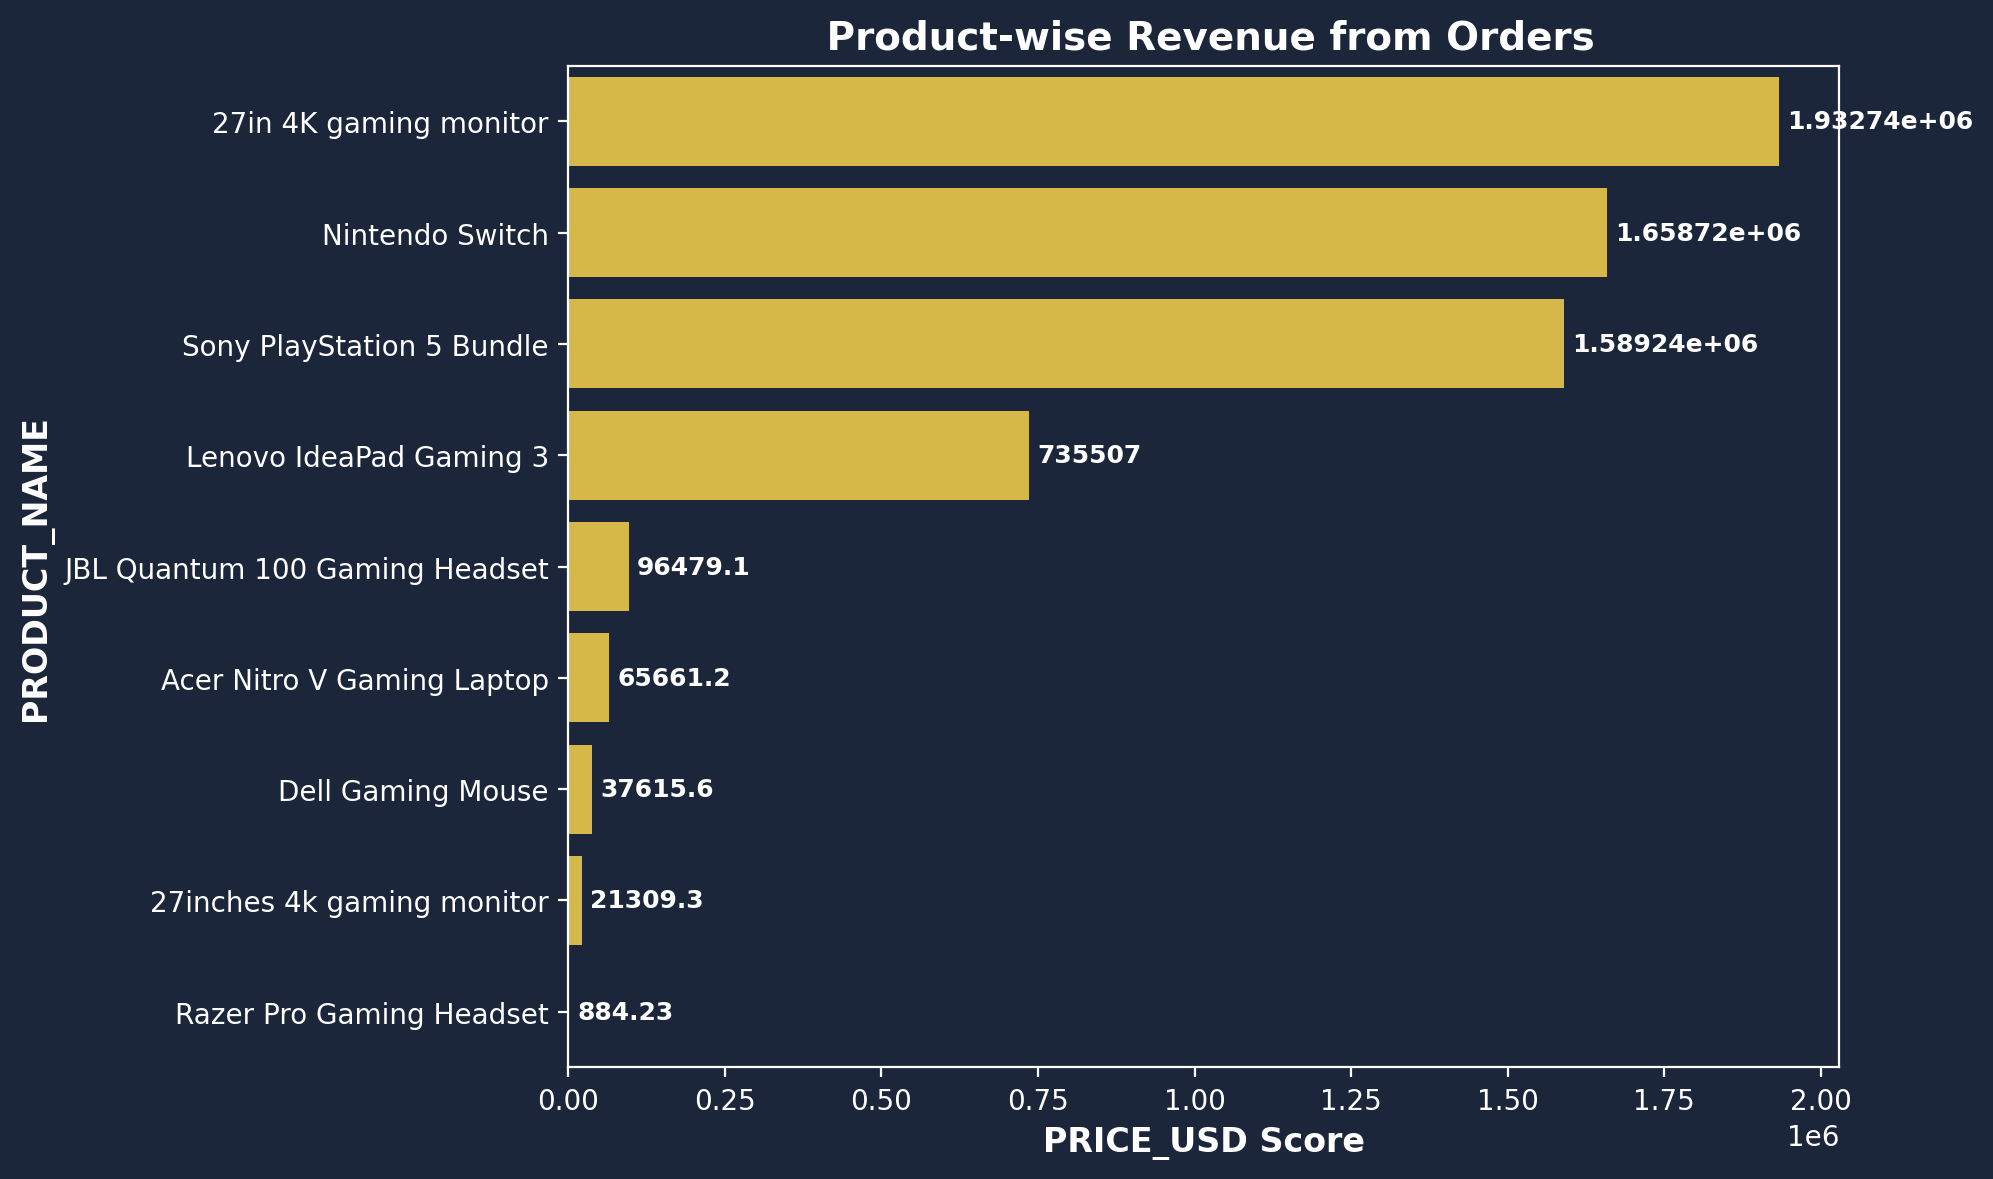

In [104]:
product_revenue = df.groupby('PRODUCT_NAME')['PRICE_USD'].sum().to_frame().sort_values(by='PRICE_USD',ascending=False)

plt.figure(figsize=(10,6),dpi=200)

plt.rcParams.update({
    'figure.facecolor': '#1b263b', 
    'axes.facecolor': '#1b263b',   
    'axes.edgecolor': 'white',     
    'axes.labelcolor': 'white',    
    'xtick.color': 'white',        
    'ytick.color': 'white',        
    'text.color': 'white',         
    'axes.titleweight': 'bold',    
    'axes.labelweight': 'bold',    
})
ax = sns.barplot(data = product_revenue, x = 'PRICE_USD', y = 'PRODUCT_NAME', color = '#edc531')

for bar in ax.containers:
    ax.bar_label(bar, padding = 3, weight = 'bold', fontsize = 9)

plt.title(' Product-wise Revenue from Orders', fontsize = 14, weight = 'bold')
plt.ylabel('PRODUCT_NAME', fontsize = 12, weight = 'bold')
plt.xlabel('PRICE_USD Score', fontsize = 12, weight = 'bold')

plt.tight_layout();

### 2.Design Orders by Marketing Channels.

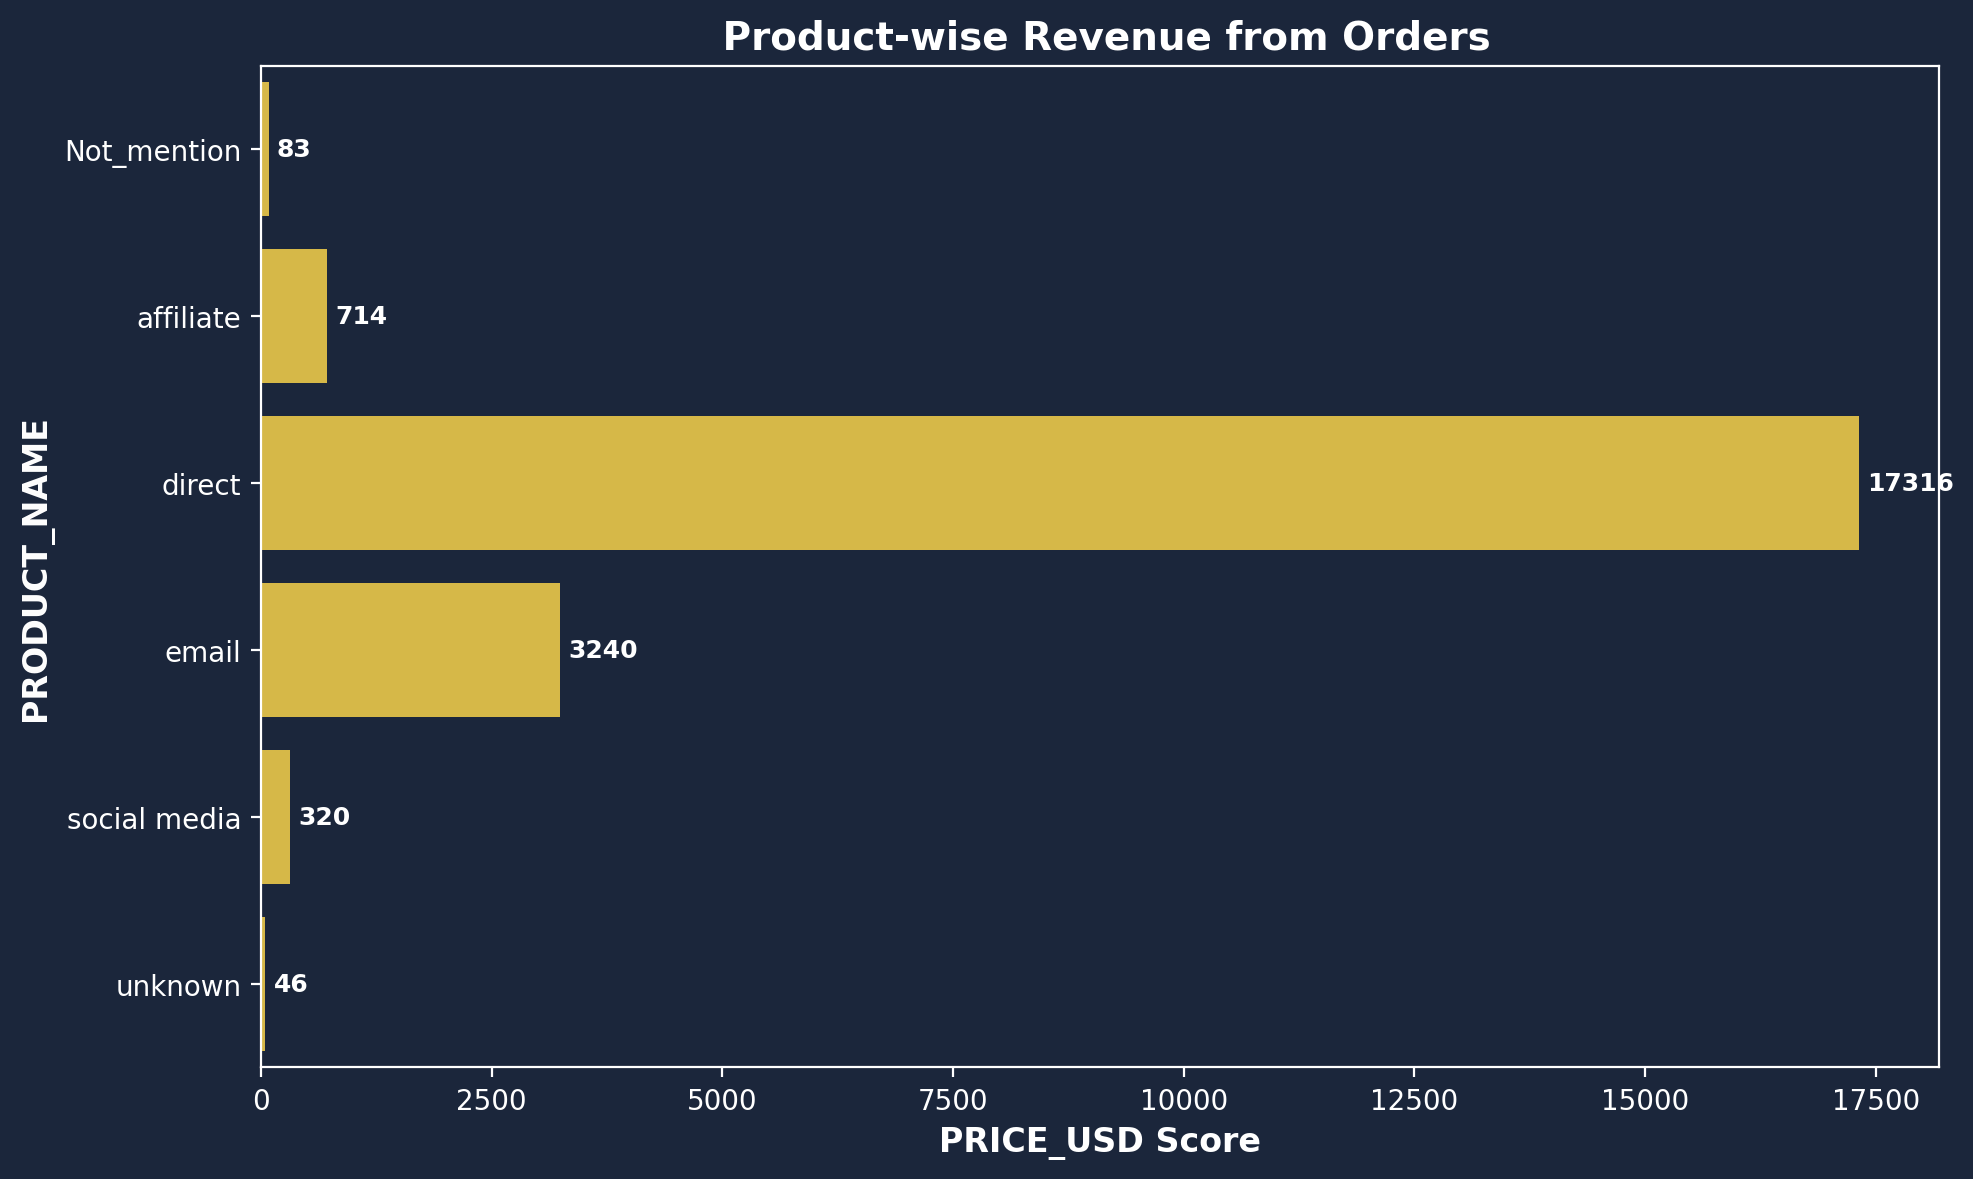

In [106]:
grouped = df.groupby('MARKETING_CHANNEL')['ORDER_ID'].nunique().to_frame().reset_index()
plt.figure(figsize=(10, 6),dpi=200)

plt.rcParams.update({
    'figure.facecolor': '#1b263b', 
    'axes.facecolor': '#1b263b',   
    'axes.edgecolor': 'white',     
    'axes.labelcolor': 'white',    
    'xtick.color': 'white',        
    'ytick.color': 'white',        
    'text.color': 'white',         
    'axes.titleweight': 'bold',    
    'axes.labelweight': 'bold',    
})
ax = sns.barplot(data =grouped,x='ORDER_ID',y='MARKETING_CHANNEL',color = '#edc531')

for bar in ax.containers:
    ax.bar_label(bar, padding = 3, weight = 'bold', fontsize = 9)

plt.title(' Product-wise Revenue from Orders', fontsize = 14, weight = 'bold')
plt.ylabel('PRODUCT_NAME', fontsize = 12, weight = 'bold')
plt.xlabel('PRICE_USD Score', fontsize = 12, weight = 'bold')

plt.tight_layout()
plt.show()

### 3.Design Weekly Patterns in Oders Shipped (2019 - 2021).

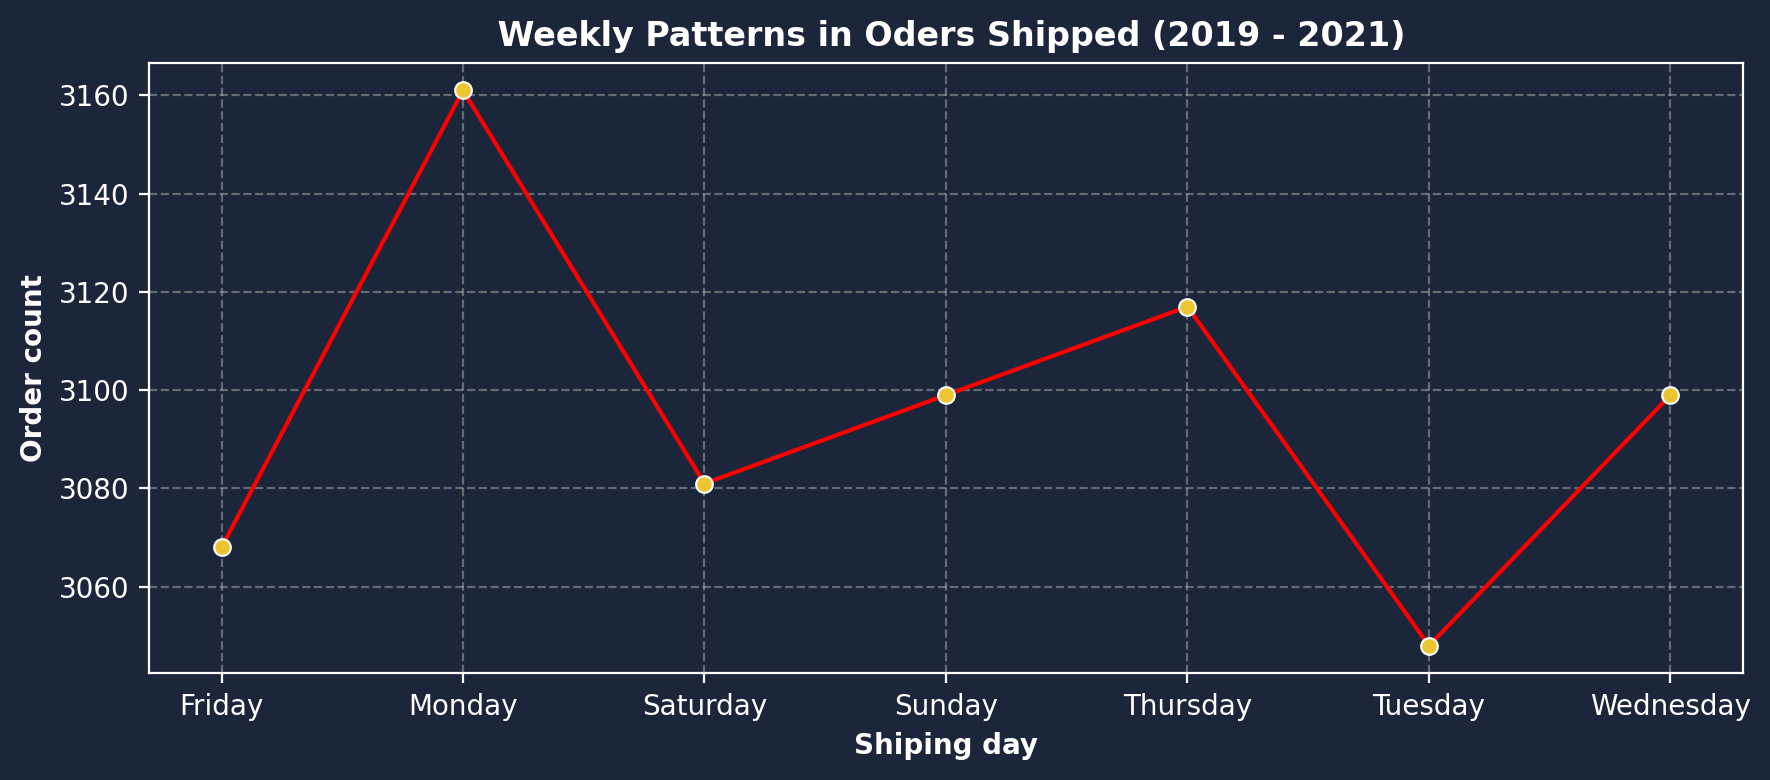

In [108]:
df['SHIPING_DAY']=df.SHIP_DATE.dt.weekday
day_label={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['SHIPING_DAY']=df['SHIPING_DAY'].map(day_label)

df=df[(df['SHIP_DATE'].dt.year>=2019) & (df['SHIP_DATE'].dt.year<=2021)]
grouped=df.groupby('SHIPING_DAY')['ORDER_ID'].nunique().to_frame().reset_index()

plt.figure(figsize=(9,4),dpi=200)
sns.lineplot(x='SHIPING_DAY',y='ORDER_ID',data=grouped,color='red',marker='o',markerfacecolor='#edc531')
plt.grid(True,linestyle='--',alpha=0.5)
plt.ylabel('Order count')
plt.xlabel('Shiping day')
plt.title(' Weekly Patterns in Oders Shipped (2019 - 2021)')
plt.tight_layout()
plt.show()


### 4.Design Yearly Order Volume Trends.

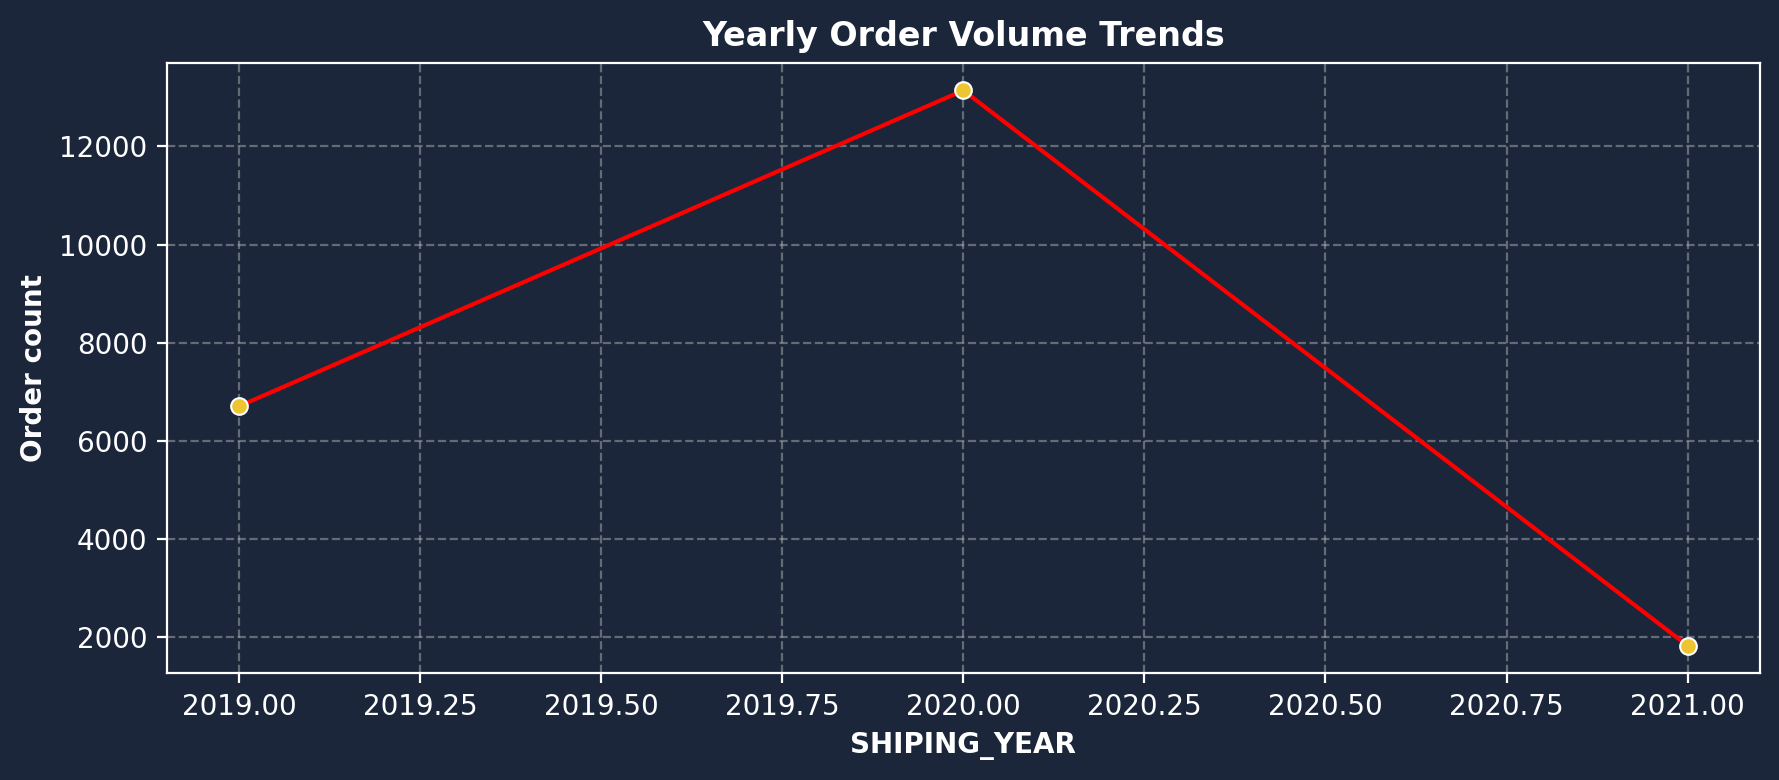

In [110]:
df['SHIPING_YEAR']=df['SHIP_DATE'].dt.year
grouped=df.groupby('SHIPING_YEAR')['ORDER_ID'].nunique().to_frame().reset_index()
plt.figure(figsize=(9,4),dpi=200)
sns.lineplot(x='SHIPING_YEAR',y='ORDER_ID',data=grouped,color='red',marker='o',markerfacecolor='#edc531')
plt.grid(True,linestyle='--',alpha=0.5)
plt.ylabel('Order count')
plt.title('Yearly Order Volume Trends')
plt.tight_layout()
plt.show()

### 5.Design Orders Shipped by Year.

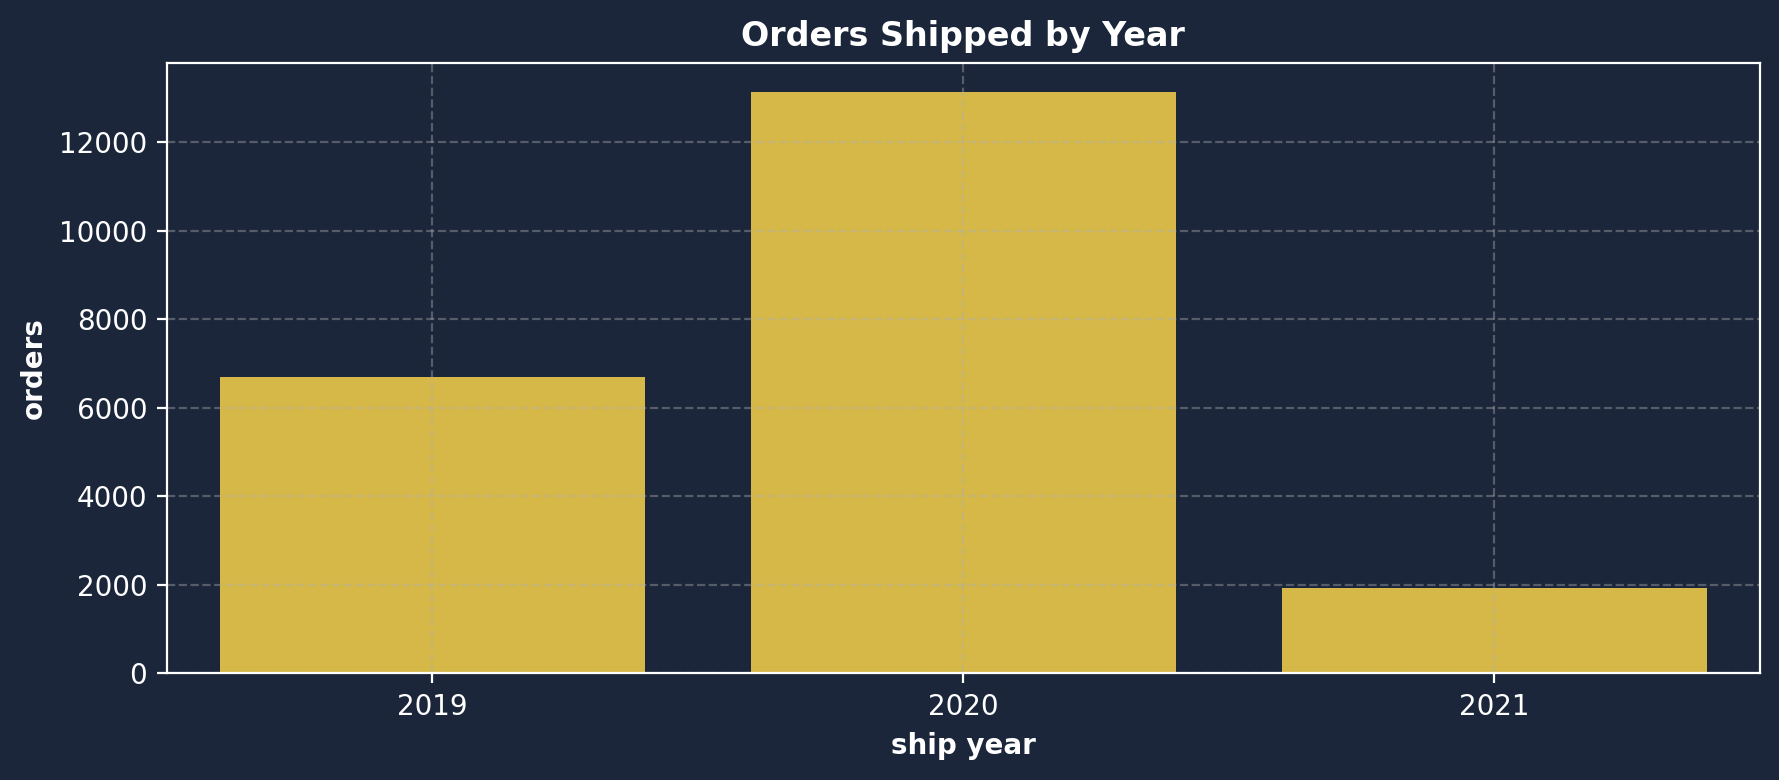

In [119]:
plt.figure(figsize=(9,4),dpi=200)
sns.countplot(x='SHIPING_YEAR',data=df,color='#edc531')
plt.title('Orders Shipped by Year')
plt.xlabel('ship year')
plt.ylabel('orders')
plt.grid(linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()

In [45]:
df.to_csv('E-Cart_Data.csv',index=False)